# Leearning
https://docs.pymc.io/notebooks/sgfs_simple_optimization.html

In [1]:

%matplotlib inline
import functools
import numpy as np
from theano import theano, tensor as tt
import matplotlib.pyplot as plt
import pymc3 as pm
np.random.seed(42)



/Users/balarsen/miniconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
def f(x, a, b, c):
    return a*x**2 + b*x + c

a, b, c = 1, 2, 3
min_ = np.array([-b/2/a])

/Users/balarsen/.local/lib/python3.6/site-packages/pymc3/data.py:236: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  self.shared = theano.shared(data[in_memory_slc])
/Users/balarsen/.local/lib/python3.6/site-packages/pymc3/data.py:236: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  self.shared = theano.shared(data[in_memory_slc])


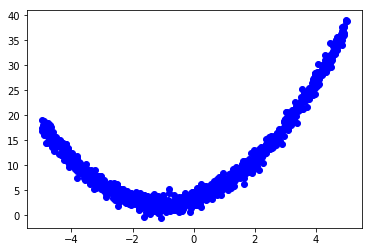

In [3]:
batch_size = 10
total_size = batch_size*100
def xy_obs_generator(batch_size):
    while True:
        x_obs = np.random.uniform(-5, 5, size=(batch_size,)).astype('float32')
        result = np.asarray([x_obs, f(x_obs, a, b, c) + np.random.normal(size=x_obs.shape).astype('float32')])
        yield result

x_train = np.random.uniform(-5, 5, size=(total_size,)).astype('float32')
x_obs = pm.Minibatch(x_train, batch_size=batch_size)

# xy_obs = pm.generator(xy_obs_generator(batch_size))
y_train = f(x_train, a, b, c) + np.random.normal(size=x_train.shape).astype('float32')
y_obs = pm.Minibatch(y_train, batch_size=batch_size)

# Example observation
# obs = xy_obs.eval()
plt.plot(x_train, y_train, 'bo');

/Users/balarsen/.local/lib/python3.6/site-packages/pymc3/step_methods/sgmcmc.py:112: UserWarning: Warning: Stochastic Gradient based sampling methods are experimental step methods and not yet recommended for use in PyMC3!
  warnings.warn(EXPERIMENTAL_WARNING)
Multiprocess sampling (2 chains in 2 jobs)
SGFS: [abc]
Sampling 2 chains: 100%|██████████| 3000/3000 [00:01<00:00, 2898.72draws/s]
/Users/balarsen/miniconda3/lib/python3.6/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)


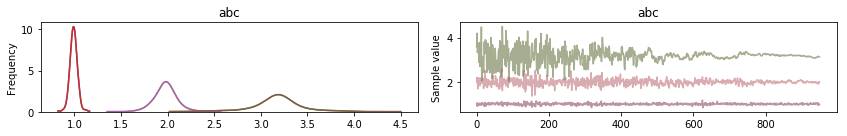

In [4]:
burn_in = 50
draws = 1000

with pm.Model() as model:
    abc = pm.Normal('abc', sd=1, mu=1, shape=(3,))
    x = x_obs
    x2 = x**2
    o = tt.ones_like(x)
    X = tt.stack([x2, x, o]).T
    y = X.dot(abc)
    pm.Normal('y', mu=y, observed=y_obs, total_size=total_size)

    step_method = pm.SGFS(batch_size=batch_size, step_size=1.0, total_size=total_size)
    trace = pm.sample(draws=draws, step=step_method, init=None)

pm.traceplot(trace[burn_in:]);

In [9]:
pm.summary(trace)

/Users/balarsen/miniconda3/lib/python3.6/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
abc__0,0.991549,0.040337,0.000995,0.910468,1.065091,1671.877286,0.9995
abc__1,1.980356,0.128208,0.002984,1.693651,2.218789,1840.488769,0.9995
abc__2,3.163977,0.309625,0.010199,2.519946,3.899672,918.676691,0.9995


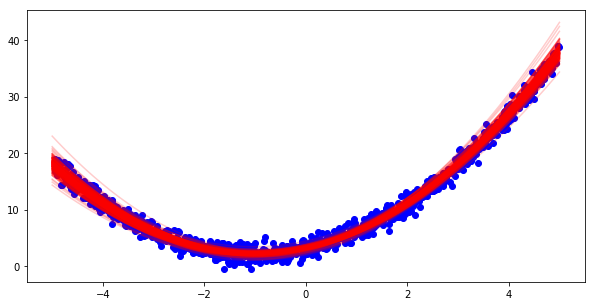

In [15]:
plt.figure(figsize=(10,5))
plt.plot(x_train, y_train, 'bo');
x = np.linspace(-5,5, 100)
for i in np.random.randint(0, len(trace), 200):
    a,b,c = trace['abc'][i]
    y = f(x, a, b, c)
    plt.plot(x, y, c='r', alpha=0.2)

In [7]:
burn_in = 50
draws = 1000

with pm.Model() as model2:
    abc = pm.Normal('abc', sd=1, mu=1, shape=(3,))
    x = x_obs
    x2 = x**2
    o = tt.ones_like(x)
    X = tt.stack([x2, x, o]).T
    y = X.dot(abc)
    pm.Normal('y', mu=y, observed=y_obs, total_size=total_size)

#     step_method = pm.SGFS(batch_size=batch_size, step_size=1.0, total_size=total_size)
    trace2 = pm.sample(draws=draws)

pm.traceplot(trace[burn_in:]);

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [abc]
Sampling 2 chains:   7%|▋         | 197/3000 [00:00<00:01, 2450.29draws/s]


RuntimeError: Chain 0 failed.

In [8]:
pm.summary(trace)

/Users/balarsen/miniconda3/lib/python3.6/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
abc__0,0.991549,0.040337,0.000995,0.910468,1.065091,1671.877286,0.9995
abc__1,1.980356,0.128208,0.002984,1.693651,2.218789,1840.488769,0.9995
abc__2,3.163977,0.309625,0.010199,2.519946,3.899672,918.676691,0.9995


In [6]:
pm.summary(trace2)

NameError: name 'trace2' is not defined